# K-means Clustering on Mall Customers

#### Created by: Polin Tsenova

Shopping centers are preffered places by many. Owners of businesses are always interested to know what their customers are. Customer segmentation is one of the techniques to divide the customers into groups according to their characteristics. This notebook uses the machine learning algoritm K-means to explore and cluster into groups the customers of a shpping center.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px

### Load Data

In [2]:
mall_data = pd.read_csv('Mall_Customers.csv')

In [3]:
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Intial Data Exploration

In [4]:
mall_data.shape

(200, 5)

In [5]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
mall_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
mall_data.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending'}, inplace = True)

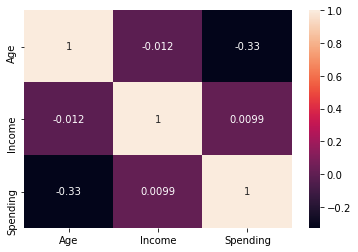

In [9]:
correlation = mall_data[['Age', 'Income', 'Spending']].corr()
sns.heatmap(correlation, annot = True)
plt.show()

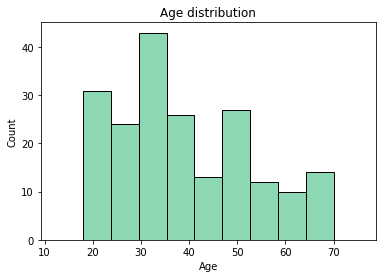

In [10]:
sns.histplot(mall_data['Age'],color='#66CC99')
plt.title('Age distribution') 
plt.axis('equal') 
plt.show()

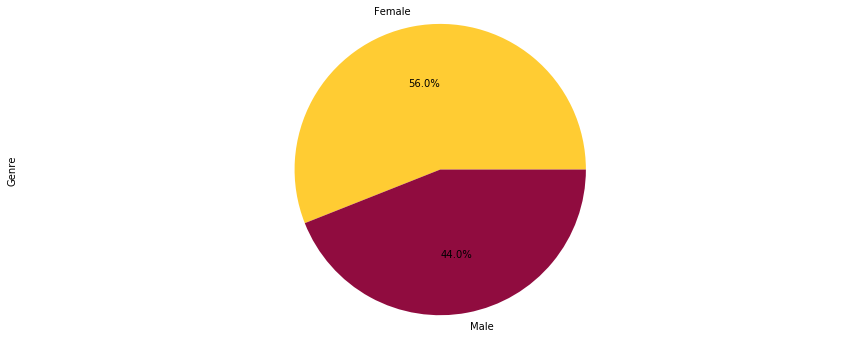

In [11]:
colors_list = ['#FFCC33', '#900C3F']
mall_data['Genre'].value_counts().plot(kind='pie',figsize=(15, 6), autopct='%1.1f%%', colors=colors_list)
plt.axis('equal') 
plt.show()

C:\Users\polin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\polin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


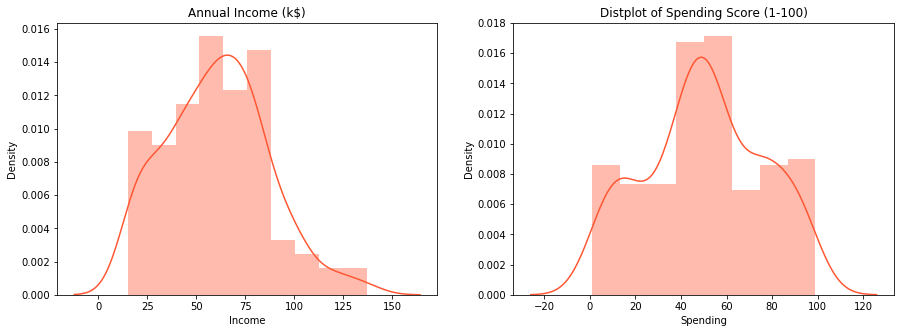

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(mall_data['Income'], color='#FF5733')
plt.title('Annual Income (k$)')
plt.subplot(1,2,2)
sns.distplot(mall_data['Spending'], color='#FF5733')
plt.title('Distplot of Spending Score (1-100)')
plt.show()

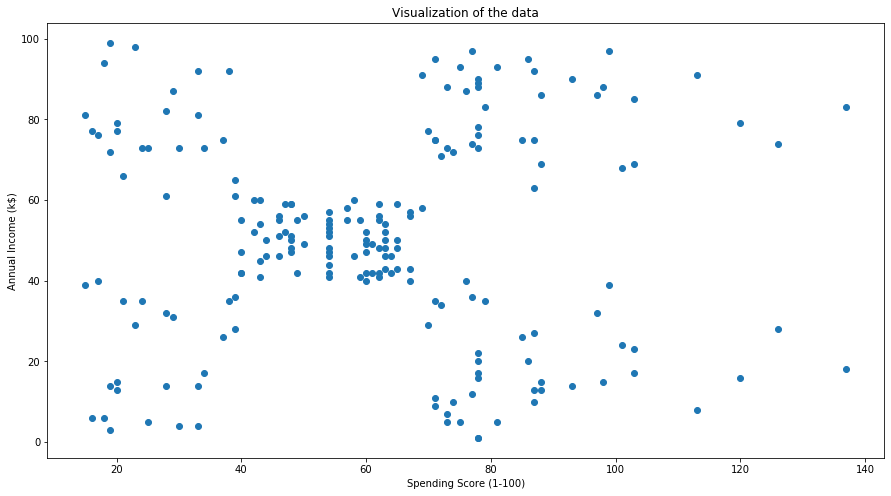

In [13]:
plt.figure(figsize=(15,8))
plt.title("Visualization of the data")
plt.scatter(mall_data['Income'], mall_data['Spending'], cmap='Set2')
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

### Modeling

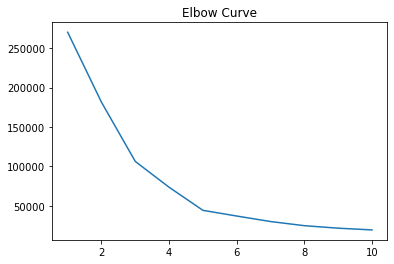

In [14]:
X = mall_data.drop(['CustomerID', 'Genre', 'Age'], axis = 1)
SSE=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,11),SSE)
plt.title('Elbow Curve')
plt.show()

In [15]:
kmeans_model=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=25)
kmeans_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=25, tol=0.0001, verbose=0)

In [16]:
labels = kmeans_model.predict(X)

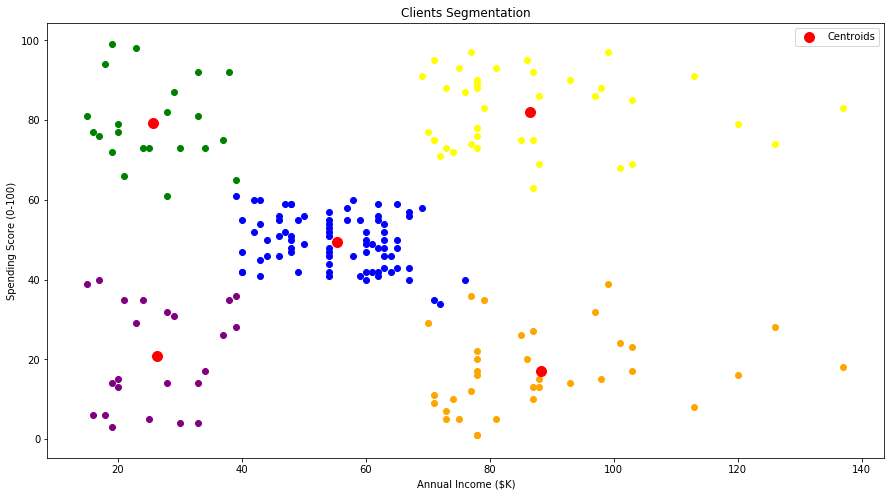

In [17]:
plt.figure(figsize=(15,8))
plt.scatter(X[labels==0].iloc[:,0], X[labels==0].iloc[:,1], c = 'purple')
plt.scatter(X[labels==1].iloc[:,0], X[labels==1].iloc[:,1], c = 'blue')
plt.scatter(X[labels==2].iloc[:,0], X[labels==2].iloc[:,1], c = 'green')
plt.scatter(X[labels==3].iloc[:,0], X[labels==3].iloc[:,1], c = 'yellow')
plt.scatter(X[labels==4].iloc[:,0], X[labels==4].iloc[:,1], c = 'orange')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.title("Clients Segmentation")
plt.xlabel("Annual Income ($K)")
plt.ylabel("Spending Score (0-100)")
plt.legend()
plt.show()

### Analysing the Results

K-means model was built to cluster Mall Customers into groups. The notebook investigates 200 shoppers by 4 indicators. The data shows that women are doing more shopping than men constituting 56% of all customers. The average age of a shopper is 39 years, with average income of 60 annually. From the visualisation distribution plots, it can be concluded that income is right skewed, while the spending score is normally distributed. The most important and difficult part of building a K-means algoritm is to choose the right value for K. For this purpose elbow curve was build to visually present which are the best choices. Customers were segmented into 5 different groups as follows:
* Low income and low spending
* Low income and high spending
* Average income and average spending
* High income and low spending
* High income and high spending

Having this information in hands different stratigic decisions could be taken. Different target groups can be targeted differently -customer retention policies, promotions, special offers. All these can suport the business for better management.